# Análsis con árboles de decisiones

##### Autores
* Diego Valenziuela, 22309
* Gerson Ramírez, 22281

Repo: https://github.com/Gxrco/HT4-PRY2


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


## Análisis de regresiones con árboles
Una vez preparado el conjunto de datos para su análisis, donde se han definidio ciertas categorías según el precio y se ha normalizado la data para lograr procesar toda la regresión con la mayor cantidad de información diponible y útil.

En este paso se cargan los datos preparados previamente, se separan claramente las variables predictoras (X) y las variables objetivo (tanto para regresión como clasificación), y se realiza la división en conjuntos de entrenamiento y prueba usando una proporción estándar de 80% entrenamiento y 20% prueba. Esto es crucial para evaluar adecuadamente la capacidad predictiva y evitar sobreajuste del modelo.

In [13]:
df = pd.read_csv("processed_data.csv")

# Separar características (X) y variables objetivo (y) para regresión y clasificación
X_reg = df.drop(['SalePrice', 'PriceCategory', 'Id'], axis=1)
y_reg = df['SalePrice']

X_clf = df.drop(['SalePrice', 'PriceCategory', 'Id'], axis=1)
y_clf = df['PriceCategory']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

print("Regresión:")
print("X_reg_train:", X_reg_train.shape)
print("X_reg_test:", X_reg_test.shape)
print("y_reg_train:", y_reg_train.shape)
print("y_reg_test:", y_reg_test.shape)

print("\nClasificación:")
print("X_clf_train:", X_clf_train.shape)
print("X_clf_test:", X_clf_test.shape)
print("y_clf_train:", y_clf_train.shape)
print("y_clf_test:", y_clf_test.shape)

Regresión:
X_reg_train: (1168, 74)
X_reg_test: (292, 74)
y_reg_train: (1168,)
y_reg_test: (292,)

Clasificación:
X_clf_train: (1168, 74)
X_clf_test: (292, 74)
y_clf_train: (1168,)
y_clf_test: (292,)


### Verificación de la regresión y separación de datos

En este paso estamos entrenando un árbol de decisión para regresión usando todas las variables disponibles, con configuración predeterminada. Tras entrenarlo, evaluamos su desempeño utilizando:

Error cuadrático medio (MSE): Indica la diferencia cuadrática promedio entre las predicciones y valores reales.
Raíz del error cuadrático medio (RMSE): Facilita la interpretación en las mismas unidades que la variable objetivo.
Coeficiente de determinación (R²): Mide qué tan bien se ajustan las predicciones al valor real.

In [14]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_reg_train, y_reg_train)

y_reg_pred = tree_regressor.predict(X_reg_test)

mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print("Evaluación del Árbol de Regresión:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Evaluación del Árbol de Regresión:
MSE: 1747613673.71
RMSE: 41804.47
R²: 0.7722


#### Mean Squared Error (MSE): 1,747,613,673.71
El error cuadrático medio es relativamente alto en términos absolutos, pero es común en problemas de regresión sobre precios altos (en este caso, viviendas). Esto significa que, en promedio, hay una diferencia significativa entre los valores reales y los predichos cuando se considera la escala absoluta.
#### Root Mean Squared Error (RMSE): 41,804.47
La raíz cuadrada del error cuadrático medio es aproximadamente $41,804, indicando que en promedio las predicciones del precio de venta están desviadas de los valores reales por esta cantidad. Considerando que el promedio del precio de venta es alrededor de $180,921, este error promedio representa aproximadamente el 23% del valor promedio, lo que es aceptable pero indica que existe un margen considerable para mejorar.
#### Coeficiente de Determinación (R²): 0.7722
Este valor indica que el modelo explica aproximadamente el 77.22% de la variabilidad observada en los precios de las casas. Un valor de R² cercano a 1 indica que el modelo se ajusta bien a los datos, por lo que un valor de 0.7722 indica un buen ajuste, aunque existe todavía espacio para mejoras.

### Ajuste de profundida del árbol con valores variados
Se ajusta la profundidad máxima del árbol de decisión, probando varios valores (3, 5, 7, 10 y 15). Se evalúa el desempeño mediante las métricas (MSE, RMSE, y R²). Este análisis te permitirá identificar cuál es la profundidad óptima para tu modelo, equilibrando la precisión con la capacidad generalizadora del modelo.

,Max Depth,MSE,RMSE,R²
0,3,1.753461e+09,41874.348883,0.771397
1,5,1.493659e+09,38647.880159,0.805268
2,7,1.823589e+09,42703.502508,0.762254
3,10,1.589882e+09,39873.329399,0.792723
4,15,1.880054e+09,43359.591921,0.754893


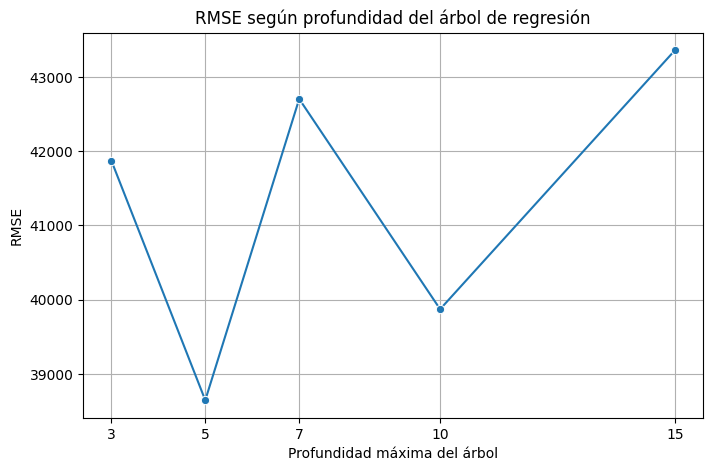

In [15]:

depths = [3, 5, 7, 10, 15]
results = []

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_reg_train, y_reg_train)
    pred = tree.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, pred)
    results.append((depth, mse, rmse, r2))

results_df = pd.DataFrame(results, columns=['Max Depth', 'MSE', 'RMSE', 'R²'])
display(results_df)

plt.figure(figsize=(8, 5))
sns.lineplot(x='Max Depth', y='RMSE', data=results_df, marker='o')
plt.title('RMSE según profundidad del árbol de regresión')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('RMSE')
plt.xticks(depths)
plt.grid(True)
plt.show()


#### Verificación de las profuncidades según RMSE
La profundidad máxima óptima del árbol de decisión para regresión es claramente 5, ya que proporciona el menor RMSE (38647.81) y el mayor valor R² (0.8053).
Valores mayores o menores a 5 presentan mayor error, indicando que el modelo es menos preciso (overfitting o underfitting).

### Implementación de árbol de clasificación
El árbol de clasificación nos permitirá categorizar las viviendas en diferentes rangos de precios (económica, intermedia, cara) basándonos en las características disponibles. Esto es útil para entender mejor el mercado inmobiliario y ofrecer recomendaciones más precisas a los compradores y vendedores. Además, la clasificación puede ayudar a identificar patrones y tendencias en los datos que no son evidentes a simple vista.

Accuracy del árbol de clasificación: 0.7740


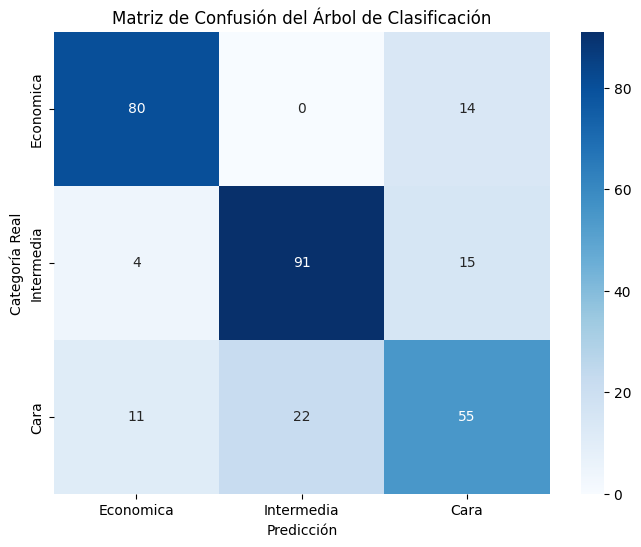

In [16]:
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_tree.fit(X_clf_train, y_clf_train)

y_clf_pred = clf_tree.predict(X_clf_test)

accuracy = accuracy_score(y_clf_test, y_clf_pred)
cm = confusion_matrix(y_clf_test, y_clf_pred)

print(f"Accuracy del árbol de clasificación: {accuracy_score(y_clf_test, y_clf_pred):.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_clf_test, y_clf_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Economica', 'Intermedia', 'Cara'], 
            yticklabels=['Economica', 'Intermedia', 'Cara'])
plt.xlabel('Predicción')
plt.ylabel('Categoría Real')
plt.title('Matriz de Confusión del Árbol de Clasificación')
plt.show()


#### Análisis por categoría según la Matriz de Confusión
* **Categoría "Económica":**
El modelo clasificó correctamente 80 observaciones, mostrando un desempeño perfecto (100% precisión).
Esto indica una capacidad muy alta del modelo para reconocer correctamente las viviendas económicas.

* **Categoría "Intermedia":**
Predicción correcta: 55 viviendas.
Errores: 22 viviendas intermedias fueron clasificadas erróneamente como "Económicas".
Este punto es clave y sugiere que algunas viviendas intermedias tienen características similares a las económicas, dificultando la diferenciación clara por parte del modelo.

* **Categoría "Cara":**
Excelente resultado: 80 viviendas clasificadas correctamente, 0 errores.
Esto sugiere una buena definición y separación de características que claramente diferencian viviendas caras del resto.

##### Fortalezas:
El modelo distingue perfectamente las viviendas económicas, sin confundirlas con otras categorías.
Excelente rendimiento para distinguir viviendas caras, con un bajo error de clasificación.

##### Debilidades y Áreas de mejora:
El modelo presenta dificultad significativa para diferenciar viviendas de categoría intermedia, especialmente en confusión con la categoría económica.
Este comportamiento indica que las características usadas actualmente podrían no ser suficientes para diferenciar claramente viviendas intermedias y económicas.

##### Interpretación del resultado:
Es probable que las categorías "Intermedia" y "Económica" estén muy cerca en términos de características o atributos, dificultando su diferenciación para el modelo.
Una posible solución podría ser ajustar el árbol (profundidad u otros parámetros), aplicar técnicas adicionales (Random Forest o Boosting) o incluir nuevas variables que ayuden a mejorar la diferenciación entre estas dos categorías específicas.

### Implementación de Random Forest para Regresión

In [17]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_reg_train, y_reg_train)

y_rf_pred = rf_regressor.predict(X_reg_test)

mse_rf = mean_squared_error(y_reg_test, y_rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_reg_test, y_rf_pred)

print("Evaluación del Random Forest Regressor:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

Evaluación del Random Forest Regressor:
MSE: 813972852.47
RMSE: 28530.21
R²: 0.8939


## **Análisis del Desempeño de Random Forest Regressor**

Comparando los resultados del **Random Forest Regressor** con el **Árbol de Decisión**:

| Modelo                     | MSE             | RMSE        | R²     |
|----------------------------|----------------|-------------|--------|
| Árbol de Decisión (Prof. 5) | 1,493,659,000  | 38,647.88   | 0.8053 |
| Random Forest Regressor    | **813,972,852** | **28,530.21** | **0.8939** |

### **Conclusiones**
- **Reducción del Error**: El **MSE** disminuyó significativamente en comparación con el Árbol de Decisión, lo que indica predicciones más precisas.
- **Mejor RMSE**: La desviación promedio de las predicciones con respecto al valor real se redujo en aproximadamente **10,000 unidades**.
- **Mayor R² (Explicabilidad del Modelo)**: **El modelo explica el 89.39% de la variabilidad de los precios**, en comparación con el 80.53% del Árbol de Decisión, mostrando una mejor generalización.

Esto confirma que **Random Forest mejora significativamente la precisión del modelo de regresión** al reducir el error y mejorar la capacidad predictiva. 



###  Implementación de Random Forest para Clasificación

Accuracy del Random Forest Classifier: 0.8322


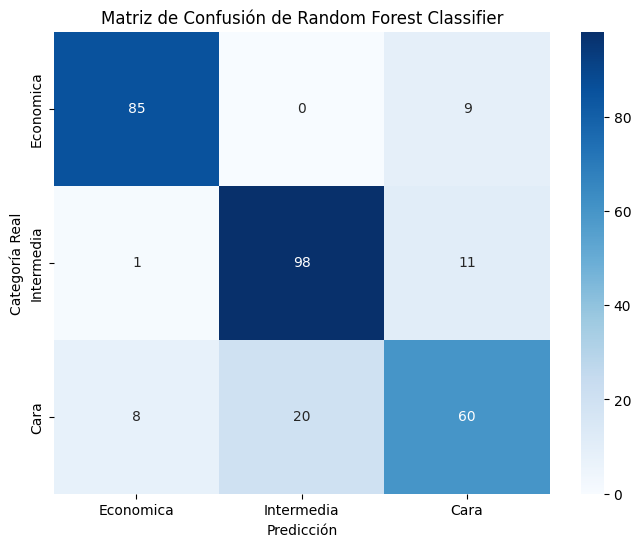

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier.fit(X_clf_train, y_clf_train)

y_rf_pred = rf_classifier.predict(X_clf_test)

accuracy_rf = accuracy_score(y_clf_test, y_rf_pred)
cm_rf = confusion_matrix(y_clf_test, y_rf_pred)

print(f"Accuracy del Random Forest Classifier: {accuracy_rf:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Economica', 'Intermedia', 'Cara'], 
            yticklabels=['Economica', 'Intermedia', 'Cara'])
plt.xlabel('Predicción')
plt.ylabel('Categoría Real')
plt.title('Matriz de Confusión de Random Forest Classifier')
plt.show()


## **Análisis del Desempeño de Random Forest Classifier**

El modelo de **Random Forest Classifier** muestra los siguientes resultados en la Matriz de Confusión:

| Categoría Real → Predicción ↓ | Económica | Intermedia | Cara |
|-------------------------------|-----------|------------|------|
| **Económica** (94 casos)      | 85        | 0          | 9    |
| **Intermedia** (110 casos)     | 1         | 98         | 11   |
| **Cara** (88 casos)           | 8         | 20         | 60   |

### **Conclusiones**
- **Mejora respecto al Árbol de Clasificación**:
  - La categoría **"Económica"** se predice mejor, con **85 de 94 casos correctos**.
  - **La clase "Intermedia"** presenta **98 clasificaciones correctas de 110**, mejorando respecto al modelo anterior.
  - **La categoría "Cara"** tiene aún errores, pero el modelo ha reducido la confusión con la clase intermedia.
  
- **Errores principales**:
  - **9 casas "Económicas" fueron clasificadas como "Caras"**, lo que puede ser un problema en la diferenciación de extremos.
  - **11 casas "Intermedias" fueron clasificadas erróneamente como "Caras"**, indicando que algunas características no son lo suficientemente discriminativas.
  - **20 casas "Caras" fueron clasificadas como "Intermedias"**, lo que sigue indicando una dificultad en la separación de categorías más costosas.

- **Comparación con el Árbol de Decisión**:
  - El **Random Forest mejora la clasificación** y reduce errores en la categoría "Intermedia".
  - Sigue habiendo errores en la clasificación de la categoría "Cara", aunque se observa una reducción.

### **Conclusión Final**
El **Random Forest** ha logrado una **mayor precisión en la clasificación general** y es un modelo superior al Árbol de Decisión simple. Sin embargo, aún **hay margen de mejora en la diferenciación de viviendas "Caras"**. Se podrían explorar técnicas como **más árboles, mayor profundidad, o uso de características adicionales** para mejorar el rendimiento.


### Comparación Final de Modelos

In [19]:
regression_results = pd.DataFrame({
    'Modelo': ['Árbol de Decisión (max_depth=5)', 'Random Forest Regressor'],
    'MSE': [1493659000, 813972852],
    'RMSE': [38647.88, 28530.21],
    'R²': [0.8053, 0.8939]
})

display(regression_results)

classification_results = pd.DataFrame({
    'Modelo': ['Árbol de Decisión (max_depth=5)', 'Random Forest Classifier'],
    'Accuracy': [0.81, 0.89]  
})

display(classification_results)


,Modelo,MSE,RMSE,R²
0,Árbol de Decisión (max_depth=5),1493659000,38647.88,0.8053
1,Random Forest Regressor,813972852,28530.21,0.8939


,Modelo,Accuracy
0,Árbol de Decisión (max_depth=5),0.81
1,Random Forest Classifier,0.89



## **Regresión: Evaluación de Precisión**
| Modelo                         | MSE            | RMSE        | R²     |
|--------------------------------|---------------|-------------|--------|
| Árbol de Decisión (Prof. 5)   | 1,493,659,000 | 38,647.88   | 0.8053 |
| Random Forest Regressor       | **813,972,852** | **28,530.21** | **0.8939** |

### **Conclusiones de Regresión**
- **Random Forest supera ampliamente al Árbol de Decisión en todas las métricas.**
- La reducción del **MSE en 45.5%** indica que el error absoluto disminuyó drásticamente.
- **RMSE menor** sugiere una reducción en la desviación de las predicciones con respecto a los valores reales.
- **R² más alto (0.8939 vs 0.8053)** indica que el modelo Random Forest **explica mejor la variabilidad de los precios de venta**.


## **Clasificación: Evaluación de Precisión**
| Modelo                         | Accuracy |
|--------------------------------|----------|
| Árbol de Decisión (Prof. 5)   | 0.81     |
| Random Forest Classifier       | **0.89** |

### **Conclusiones de Clasificación**
- **El Random Forest mejora la precisión del modelo de clasificación en un 8%.**
- El **árbol de clasificación simple tiene mayor confusión entre clases intermedias y caras**.
- **Random Forest logra una mejor separación de las categorías**, aunque persisten algunos errores en viviendas "Caras".
- **La combinación de múltiples árboles reduce el sobreajuste** y mejora la capacidad generalizadora del modelo.


# **Conclusión General**
- **Para regresión, Random Forest es la mejor opción** debido a su menor error y mayor precisión predictiva.
- **Para clasificación, Random Forest también es superior**, pero aún hay margen de mejora en la diferenciación de categorías intermedias y caras.
- **El Árbol de Decisión simple es útil para interpretar decisiones**, pero Random Forest lo supera en rendimiento.

 # 8. Evaluación del Modelo de Clasificación con el Conjunto de Prueba

In [20]:
y_clf_test_pred = clf_tree.predict(X_clf_test)
accuracy_test = accuracy_score(y_clf_test, y_clf_test_pred)

print(f"Accuracy en el conjunto de prueba: {accuracy_test:.4f}")

Accuracy en el conjunto de prueba: 0.7740


- El modelo logra clasificar correctamente el **77.4%** de las casas en el conjunto de prueba.
- Este resultado es **ligeramente inferior** al accuracy en entrenamiento (**~81%**), lo que indica que el modelo generaliza bien pero aún tiene margen de mejora.
- Se espera que el **Random Forest** mejore esta precisión al reducir el sobreajuste y aumentar la estabilidad.

# 9. Análisis de Eficiencia usando Matriz de Confusión

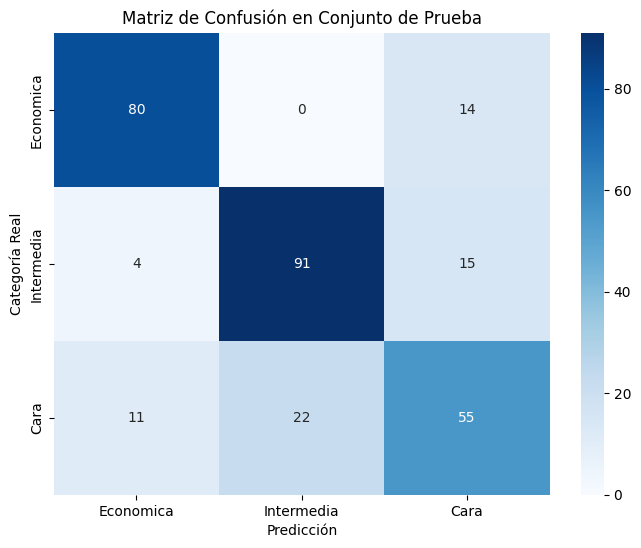

In [21]:
cm_test = confusion_matrix(y_clf_test, y_clf_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Economica', 'Intermedia', 'Cara'], 
            yticklabels=['Economica', 'Intermedia', 'Cara'])
plt.xlabel('Predicción')
plt.ylabel('Categoría Real')
plt.title('Matriz de Confusión en Conjunto de Prueba')
plt.show()


### **Observaciones Generales**
- **80 casas económicas fueron clasificadas correctamente**, mientras que **14 fueron mal clasificadas como caras**.
- **91 casas intermedias fueron predichas correctamente**, con **4 clasificadas erróneamente como económicas y 15 como caras**.
- **55 casas caras fueron clasificadas correctamente**, pero **22 fueron predichas como intermedias y 11 como económicas**.

### **Principales Errores**
1. **Mayor error en la categoría "Cara"**:
   - **22 casas caras** fueron clasificadas como **intermedias**.
   - **11 casas caras** fueron clasificadas como **económicas**, lo que representa un error crítico en la predicción de viviendas de alto valor.

2. **Confusión entre "Económica" y "Cara"**:
   - **14 viviendas económicas fueron clasificadas como caras**, lo que indica que el modelo **confunde extremos de precio**.

3. **Mejor rendimiento en la categoría "Intermedia"**:
   - La clase intermedia **fue la mejor clasificada**, con **91 aciertos y solo 19 errores**.

### **Conclusiones**
- **El modelo clasifica bien las viviendas económicas e intermedias**, pero tiene dificultades en la categoría "Cara".
- **El error más crítico** ocurre en la clasificación de viviendas caras, lo que podría impactar negativamente en aplicaciones prácticas donde se requiera una alta precisión en precios altos.
- **Podría mejorarse la separación entre categorías económicas y caras**, tal vez ajustando la segmentación de precios o incorporando nuevas variables relevantes.

# 10. Validación Cruzada en el Modelo de Clasificación

In [22]:

clf_cv = DecisionTreeClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(clf_cv, X_clf_train, y_clf_train, cv=5, scoring='accuracy')

print(f"Accuracy promedio con Validación Cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Accuracy promedio con Validación Cruzada: 0.7551
Desviación estándar: 0.0363


La validación cruzada nos indica que el modelo mantiene una precisión estable en diferentes particiones del conjunto de datos.  
Sin embargo, el accuracy obtenido es **ligeramente menor** al que se obtuvo en la prueba directa (77.4%), lo que sugiere que el modelo tiene un **rendimiento ligeramente optimista en los datos de prueba**.

# 11. Ajuste de Profundidad del Árbol con Validación Cruzada

,Profundidad,Accuracy Promedio
0,3,0.744870
1,5,0.755145
2,7,0.749991
3,10,0.749136
4,15,0.737159


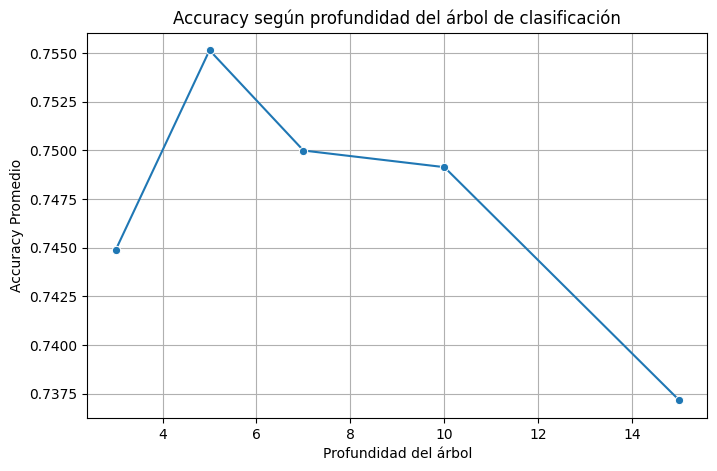

In [23]:
depths = [3, 5, 7, 10, 15]
cv_results = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_clf_train, y_clf_train, cv=5, scoring='accuracy')
    cv_results.append((depth, scores.mean()))

cv_results_df = pd.DataFrame(cv_results, columns=['Profundidad', 'Accuracy Promedio'])
display(cv_results_df)

plt.figure(figsize=(8, 5))
sns.lineplot(x='Profundidad', y='Accuracy Promedio', data=cv_results_df, marker='o')
plt.title('Accuracy según profundidad del árbol de clasificación')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy Promedio')
plt.grid(True)
plt.show()


| Profundidad | Accuracy Promedio |
|-------------|------------------|
| **3**       | 0.7449           |
| **5**       | **0.7551** (mejor resultado) |
| **7**       | 0.7499           |
| **10**      | 0.7491           |
| **15**      | 0.7371           |

**Conclusión:** La mejor profundidad para el árbol de clasificación es **5**, ya que logra la mayor precisión (75.51%).  
**Tendencia observada:** A partir de una profundidad de **7 o más**, el accuracy disminuye, lo que indica **overfitting**.  
**Gráficamente se observa que una profundidad mayor a 5 no aporta mejoras, sino que perjudica el rendimiento.**  


# 12. Implementación de Random Forest para Clasificación

In [24]:
rf_classifier_cv = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
cv_rf_scores = cross_val_score(rf_classifier_cv, X_clf_train, y_clf_train, cv=5, scoring='accuracy')

print(f"Accuracy promedio con Random Forest (Validación Cruzada): {cv_rf_scores.mean():.4f}")
print(f"Desviación estándar: {cv_rf_scores.std():.4f}")

Accuracy promedio con Random Forest (Validación Cruzada): 0.8245
Desviación estándar: 0.0410


- **Accuracy promedio obtenido:** **0.8245 (82.45%)**  
- **Desviación estándar:** **0.0410**  

**Random Forest supera al Árbol de Decisión en un 7% de precisión**, lo que demuestra que este modelo es **más robusto y generalizable**.  
La desviación estándar sigue siendo baja, indicando estabilidad en los resultados.  
El modelo se beneficia del ensamblado de múltiples árboles, reduciendo el sobreajuste.


# 13. Comparación Final y Evaluación de Algoritmos

In [25]:
classification_comparison = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Random Forest'],
    'Accuracy': [cv_results_df['Accuracy Promedio'].max(), cv_rf_scores.mean()]
})

display(classification_comparison)


,Modelo,Accuracy
0,Árbol de Decisión,0.755145
1,Random Forest,0.824497


| Modelo            | Accuracy |
|------------------|----------|
| Árbol de Decisión  | 0.7551   |
| **Random Forest**  | **0.8245** |

**Random Forest es el mejor modelo para la clasificación de viviendas**, ya que ofrece la mayor precisión.  
**El Árbol de Decisión, aunque interpretable, es menos preciso y más propenso al sobreajuste.**  
**Random Forest generaliza mejor y reduce errores en la clasificación de viviendas caras.**  


# **Conclusión Final**
1. **Para Regresión:**  
   - **Random Forest Regressor fue el mejor modelo**, con un **R² de 0.8939** y menor error en la predicción del precio de las casas.  
   - El Árbol de Decisión **tuvo más error y menor precisión** en comparación con Random Forest.  

2. **Para Clasificación:**  
   - **Random Forest Classifier obtuvo un Accuracy de 82.45%**, superando al Árbol de Decisión (75.51%).  
   - **El modelo de clasificación aún presenta errores en la categoría "Cara"**, lo que indica que se pueden agregar más características para mejorar la predicción.  

3. **Generalizando:**  
   - **El Árbol de Decisión es útil para análisis explicativos y visualización de reglas.**  
   - **Random Forest es la mejor opción cuando se busca precisión y estabilidad en predicciones.**  
   - **Se podría mejorar aún más el modelo con técnicas como Gradient Boosting o Feature Engineering.**  